[View in Colaboratory](https://colab.research.google.com/github/cassiokawa/mlnd_capstone1/blob/master/BeatlesLyricsCapstone.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

'''
Testing using Beatles song catalog to use Baggle of Words, TF-IDF for NLP code
'''

'\nTesting using Beatles song catalog to use Baggle of Words, TF-IDF for NLP code\n'

In [2]:
# Pulling data from Kaggle
# !pip install -U -q kaggle
# !mkdir -p ~/.kaggle

from google.colab import files
files.upload()

# !cp kaggle.json ~/.kaggle/

Saving beatles-lyrics.csv to beatles-lyrics.csv


{'beatles-lyrics.csv': b'title,album,year,lyrics,cover,songwriters_parsed,vocals_parsed\n12-Bar Original,Anthology 2,1965,,False,"[""John Lennon"", ""Paul McCartney"", ""George Harrison"", ""Ringo Starr""]","[""Instrumental""]"\nAcross the Universe,Let It Be,1968,"Words are flowing out like endless rain into a paper cup, They slither while they pass, they slip away across the universe Pools of sorrow, waves of joy are drifting through my open mind, Possessing and caressing me. Jai guru deva om Nothing\'s gonna change my world, Nothing\'s gonna change my world, Nothing\'s gonna change my world, Nothing\'s gonna change my world. Images of broken light which dance before me like a million eyes, They call me on and on across the universe, Thoughts meander like a restless wind inside a letter box they Tumble blindly as they make their way Across the universe Jai guru deva om Nothing\'s gonna change my world, Nothing\'s gonna change my world, Nothing\'s gonna change my world, Nothing\'s gonn

In [0]:
# !kaggle datasets list
# !chmod 600 /root/.kaggle/kaggle.json

# !kaggle datasets download -d PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums
# !ls

In [0]:
# Importing data with pandas
# import pandas as pd
# data2 = pd.read_csv('taylor-swift-song-lyrics-from-all-the-albums.zip', compression='zip', header=0, sep=',', quotechar='"')

In [5]:
# Import the dependencies
import numpy as np
import pandas as pd
import sys 
from keras.models import Sequential
from keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed, CuDNNLSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
# from zipfile import ZipFile
# zip_file = ZipFile('beatles-lyrics-master.zip')
fields= ['album', 'year','title','lyrics', 'cover', 'songwriters_parsed','vocals_parsed' ] 
# data=pd.read_csv('taylor_swift_lyrics.csv',encoding='utf-8')
data=pd.read_csv('beatles-lyrics.csv',encoding='cp1252')

data.head()

,title,album,year,lyrics,cover,songwriters_parsed,vocals_parsed
0,12-Bar Original,Anthology 2,1965,NaN,False,"[""John Lennon"", ""Paul McCartney"", ""George Harr...","[""Instrumental""]"
1,Across the Universe,Let It Be,1968,Words are flowing out like endless rain into a...,False,"[""John Lennon""]","[""Lennon""]"
2,Act Naturally,Help!,1965,They're gonna put me in the movies They're gon...,True,"[""Johnny Russell"", ""Voni Morrison""]","[""Starr""]"
3,Ain't She Sweet,Anthology 1,1961,"Oh aint she sweet, Well see her walking down t...",True,"[""Jack Yellen"", ""Milton Ager""]","[""Lennon""]"
4,All I've Got to Do,With the Beatles,1963,"Whenever I want you around, yeah. All I gotta ...",False,"[""John Lennon""]","[""Lennon""]"


In [0]:
dataset = data
dataset.head()
dataset.describe()


# Quite a bit of data pre-processing before we can apply any NLP algo.  In order to create a text with all lyrics in one string it is necessary to concatenate the lines of each song.
# def concatLyrics(lyrics, songID, songNM, row):
def concatLyrics(lyrics):
    lyricas.append(row['lyrics'] + '\n')
#     songID.append( row['year']*100+ row['track_n'])
#     songNM.append(row['track_title'])
#     return lyrics,songID,songNM
    return lyrics



In [0]:
# create collections 

# songID = []
# songNM = []

# songNum indicates the song number in the dataset
songNum = 1

# i indicates the song number

# isFirstLine = True


In [9]:
# join sentences into lyrics 
i = 0
lyricas = []
for index, row in dataset.iterrows():
#     print(row['lyrics'])
    lyricas.append(row['lyrics'])

print(lyricas)

[nan, "Words are flowing out like endless rain into a paper cup, They slither while they pass, they slip away across the universe Pools of sorrow, waves of joy are drifting through my open mind, Possessing and caressing me. Jai guru deva om Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world. Images of broken light which dance before me like a million eyes, They call me on and on across the universe, Thoughts meander like a restless wind inside a letter box they Tumble blindly as they make their way Across the universe Jai guru deva om Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world, Nothing's gonna change my world. Sounds of laughter shades of light are ringing Through my open views inciting and inviting me Limitless undying love which shines around me like a Million suns, it calls me on and on Across the universe Jai guru deva om Nothing's gonna change my w

In [0]:
# Define a new pandas DataFrame to save songID , songNM , Lyrics in it to use them later
# lyrics_data = pd.DataFrame({'songID':songID, 'songNM':songNM, 'lyrics':lyrics })
lyrics_data = pd.DataFrame({'lyricas':lyricas })

# Now save the lyrics in a text file to use it in the LSTM RNN

# Save Lyrics in .txt file
with open('lyricsText.txt', 'w') as filehandle:  

# with open('lyricsText.txt', 'w',encoding="utf-8") as filehandle:  
    for listitem in lyricas:
        filehandle.write('%s\n' % listitem)


In [0]:
# Load the dataset and convert it to lowercase :
textFileName = 'lyricsText.txt'
# raw_text = open(textFileName, encoding = 'UTF-8').read()
raw_text = open(textFileName).read()

raw_text = raw_text.lower()


In [12]:
# Mapping chars to ints :
chars = sorted(list(set(raw_text)))
int_chars = dict((i, c) for i, c in enumerate(chars))
chars_int = dict((i, c) for c, i in enumerate(chars))


# Get number of chars and vocab in our text :
n_chars = len(raw_text)
n_vocab = len(chars)

print('Total Characters : ' , n_chars) # number of all the characters in lyricsText.txt
print('Total Vocab : ', n_vocab) # number of unique characters


Total Characters :  209817
Total Vocab :  59


In [13]:
# process the dataset:
seq_len = 100
data_X = []
data_y = []

for i in range(0, n_chars - seq_len, 1):
    # Input Sequeance(will be used as samples)
    seq_in  = raw_text[i:i+seq_len]
    # Output sequence (will be used as target)
    seq_out = raw_text[i + seq_len]
    # Store samples in data_X
    data_X.append([chars_int[char] for char in seq_in])
    # Store targets in data_y
    data_y.append(chars_int[seq_out])
n_patterns = len(data_X)
print( 'Total Patterns : ', n_patterns)


Total Patterns :  209717


In [0]:
# Reshape X to be suitable to go into LSTM RNN :
X = np.reshape(data_X , (n_patterns, seq_len, 1))
# Normalizing input data :
X = X/ float(n_vocab)
# One hot encode the output targets :
y = np_utils.to_categorical(data_y)


In [0]:
LSTM_layer_num = 4 # number of LSTM layers
layer_size = [256,256,256,256] # number of nodes in each layer


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
raw_text=[raw_text]
Xis = vectorizer.fit_transform(raw_text)
print(vectorizer.get_feature_names())

['15', '90', '909', 'aaaaaaaahhhh', 'aaaaaahhhhhh', 'aaaaah', 'aaaaahhhhhhhhhh', 'aaah', 'aah', 'abc', 'able', 'aboard', 'about', 'above', 'abrigado', 'accidents', 'aches', 'acorns', 'acquainted', 'across', 'act', 'acts', 'adicionar', 'admit', 'advice', 'affection', 'afraid', 'african', 'after', 'afternoon', 'again', 'age', 'aging', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahh', 'ahhhh', 'ahhhhhh', 'aids', 'ain', 'aint', 'air', 'al', 'albert', 'alerted', 'all', 'allan', 'alley', 'almost', 'alone', 'along', 'aloud', 'already', 'alrgiht', 'alright', 'also', 'although', 'always', 'am', 'american', 'among', 'amore', 'amsterdam', 'an', 'and', 'anderen', 'angel', 'angry', 'anna', 'annoyed', 'another', 'answer', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'apart', 'apologize', 'appear', 'appears', 'apple', 'apply', 'appointment', 'appreciate', 'are', 'aren', 'arise', 'arizona', 'armchair', 'armen', 'arms', 'army', 'around', 'arrive', 'arrives', 

In [17]:
cloud_text = vectorizer.vocabulary_
print (vectorizer.vocabulary_)


{'nan': 1547, 'words': 2673, 'are': 92, 'flowing': 835, 'out': 1655, 'like': 1306, 'endless': 711, 'rain': 1842, 'into': 1141, 'paper': 1677, 'cup': 511, 'they': 2368, 'slither': 2121, 'while': 2617, 'pass': 1693, 'slip': 2120, 'away': 125, 'across': 19, 'the': 2360, 'universe': 2504, 'pools': 1772, 'of': 1618, 'sorrow': 2166, 'waves': 2582, 'joy': 1184, 'drifting': 657, 'through': 2389, 'my': 1539, 'open': 1642, 'mind': 1468, 'possessing': 1782, 'and': 67, 'caressing': 338, 'me': 1432, 'jai': 1159, 'guru': 966, 'deva': 577, 'om': 1626, 'nothing': 1598, 'gonna': 927, 'change': 370, 'world': 2679, 'images': 1110, 'broken': 289, 'light': 1302, 'which': 2615, 'dance': 528, 'before': 177, 'million': 1467, 'eyes': 752, 'call': 321, 'on': 1627, 'thoughts': 2384, 'meander': 1434, 'restless': 1886, 'wind': 2638, 'inside': 1133, 'letter': 1291, 'box': 269, 'tumble': 2471, 'blindly': 238, 'as': 104, 'make': 1395, 'their': 2361, 'way': 2583, 'sounds': 2170, 'laughter': 1262, 'shades': 2029, 'ring

In [0]:
!pip install -U -q wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

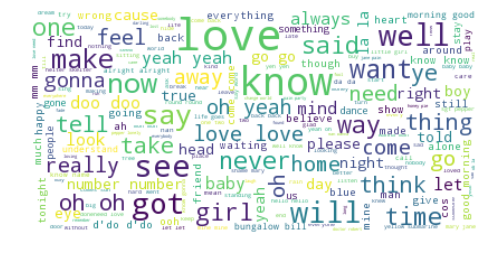

In [19]:
# Create and generate a word cloud image:

wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(raw_text[0]))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()

In [0]:
model = Sequential()

In [0]:
model.add(CuDNNLSTM(layer_size[0], input_shape =(X.shape[1], X.shape[2]), return_sequences = True))

In [0]:
for i in range(1,LSTM_layer_num) :
    model.add(CuDNNLSTM(layer_size[i], return_sequences=True))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 100, 256)          265216    
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 100, 256)          526336    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 100, 256)          526336    
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 100, 256)          526336    
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 59)                1510459   
_________________________________________________________________
activation_1 (Activation)    (None, 59)                0         
Total para

In [0]:
# Configure the checkpoint :
# checkpoint_name = 'Weights-LSTM-improvement-{epoch:03d}-{loss:.5f}-bigger.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='loss', verbose = 1, save_best_only = True, mode ='min')
callbacks_list = [checkpoint]

In [31]:
# Fit the model :
model_params = {'epochs':6,
                'batch_size':128,
                'callbacks':callbacks_list,
                'verbose':1,
                'validation_split':0.2,
                'validation_data':None,
                'shuffle': True,
                'initial_epoch':0,
                'steps_per_epoch':None,
                'validation_steps':None}
model.fit(X,
          y,
          epochs = model_params['epochs'],
           batch_size = model_params['batch_size'],
           callbacks= model_params['callbacks'],
           verbose = model_params['verbose'],
           validation_split = model_params['validation_split'],
           validation_data = model_params['validation_data'],
           shuffle = model_params['shuffle'],
           initial_epoch = model_params['initial_epoch'],
           steps_per_epoch = model_params['steps_per_epoch'],
           validation_steps = model_params['validation_steps'])

Train on 167773 samples, validate on 41944 samples
Epoch 1/6
167773/167773 [==============================] - 220s 1ms/step - loss: 1.7614 - val_loss: 2.2659

Epoch 00001: loss improved from inf to 1.76144, saving model to Weights-LSTM-improvement-001-1.76144-bigger.hdf5
Epoch 2/6
167773/167773 [==============================] - 220s 1ms/step - loss: 1.3473 - val_loss: 2.3303

Epoch 00002: loss improved from 1.76144 to 1.34726, saving model to Weights-LSTM-improvement-002-1.34726-bigger.hdf5
Epoch 3/6
167773/167773 [==============================] - 219s 1ms/step - loss: 1.0095 - val_loss: 2.5212

Epoch 00003: loss improved from 1.34726 to 1.00953, saving model to Weights-LSTM-improvement-003-1.00953-bigger.hdf5
Epoch 4/6
167773/167773 [==============================] - 221s 1ms/step - loss: 0.7479 - val_loss: 2.7060

Epoch 00004: loss improved from 1.00953 to 0.74793, saving model to Weights-LSTM-improvement-004-0.74793-bigger.hdf5
Epoch 5/6
167773/167773 [============================

In [0]:
# Load wights file :
# wights_file = './models/Weights-LSTM-improvement-004-2.49538-bigger.hdf5' # weights file path
# model.load_weights(wights_file)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [33]:
# set a random seed :
start = np.random.randint(0, len(data_X)-1)
pattern = data_X[start]
print('Seed : ')
print("\"",''.join([int_chars[value] for value in pattern]), "\"\n")
# How many characters you want to generate
generated_characters = 300
# Generate Charachters :
for i in range(generated_characters):
    x = np.reshape(pattern, ( 1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x,verbose = 0)
    index = np.argmax(prediction)
    result = int_chars[index]
    #seq_in = [int_chars[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print('\nDone')

Seed : 
"  our little hideaway beneath the waves resting our head on the sea bed in an octopus's garden near a "

 cave when i get not i'ml not  you, i've kose  lomw love and you know, she gal ger an ala wes isst whll that i hope wiere in the shooe the hisst man the mony bnd move whar a firl on then i say and h've got to lnve that he you cedatse that wou want than i love of the lonk my diaties daj dooe yeeh the
Done
